## Bar plots - Super Common
Bar plots are probably the most common plots I am used to seeing in academic conferences.<br/>
Doing just a few things right goes a long way in improving the quality of these plots.

In [7]:
import pandas as pd
from os import path
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import gridspec

# Set Matplotlib Parameters
plt.style.use('bmh')
plt.rc('text', usetex=True)   #  Might require installing TeX fonts
plt.rc('axes', facecolor='w', labelcolor='b', edgecolor='k', labelsize=16)
plt.rcParams['font.size'] = 16
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

### Load data

In [8]:
train_data = pd.read_csv("../data/bar_1.txt", skipinitialspace=True, header=None)
wer_data = pd.read_csv("../data/bar_2.txt", skipinitialspace=True)

In [9]:
# Lets take a look at the data

# Uncomment this to see the data
# print(train_data)
# print()
# print(wer_data)

### Plot Time!

We will first write a function to initialize bar plot.<br/>
Then we will draw a simple bar plot with annotations on top of bar. <br/>
And then another bar plot comparing different models. <br/>

In [10]:
def initialize_bar_plot():
    fig, ax = plt.subplots(1)
    
    # Get rid of grids and ticks
    ax.grid(b=False)
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    
    # Remove the two sides of the bounding box
    spines_to_remove = ['top', 'right']
    for spine in spines_to_remove:
        ax.spines[spine].set_visible(False)
        
    return fig, ax

### Bar plot 1
This bar plot visualizes the training set. The training set is composed of data coming from different languages.
The goal is to visualize the fraction of total data coming from a single language. 

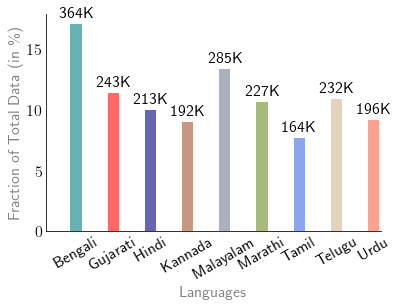

In [11]:
fig, ax = initialize_bar_plot()

# Compute fraction of data
train_data.loc[:, 2] = train_data.loc[:, 1] * 100.0/sum(train_data.loc[:, 1].values)

x_labels = train_data.loc[:, 0]
color_list = ['teal', 'r', 'navy', 'sienna', 'slategray', 'olivedrab', 'royalblue', 'tan', 'tomato']

bar_width = 0.3
cur_bar = plt.bar(bar_width + np.arange(len(x_labels)), train_data.loc[:, 2],
                  color=color_list, width=bar_width, alpha=0.6)
plt.xlim([-0.5, len(x_labels) - 0.5])  # Without this the leftmost bar is too close to 0 


# SET TICKS & LABELS
# Rotation due to lack of space - You want the text to be big even if it's rotated.
plt.xticks(np.arange(len(x_labels)) + bar_width, x_labels, rotation=30) 
plt.xlabel("Languages", color="grey")
plt.ylabel("Fraction of Total Data (in \%)", color="grey")

# Annotate text
for rect, height, label in zip(cur_bar, train_data.loc[:, 2], train_data.loc[:, 1]):
    label = f'{label//10**3}K'
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.25, label, ha='center', va='bottom')


# plt.tight_layout(pad=0.07)
plt.savefig("../plots/bar_1.jpg", format='jpg', dpi=300)

### Bar Plot 2
This bar plot compares different models.  

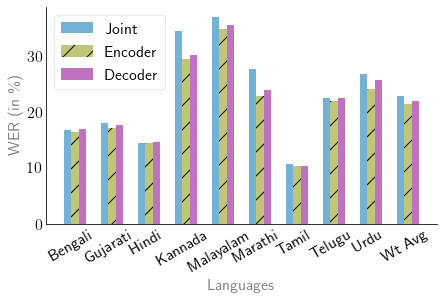

In [12]:
fig, ax = initialize_bar_plot()

model_list = ['Joint', 'Encoder', 'Decoder']
x_labels = wer_data.loc[:, "Language"].values
color_list = ['#0173b2', '#8f9805', 'darkmagenta']
pattern_list = ['', '/', '']  # Adding patters to the plot can help color blind folks
    
bar_width = 0.2
bar_list = []
for idx, model in enumerate(model_list):
    # Create bar plots - Shift the bar plots for the next model by bar_width
    cur_bar = plt.bar((idx + 1) * bar_width + np.arange(len(x_labels)), wer_data.loc[:, model].values,
                      color=color_list[idx], width=bar_width, alpha=0.55, hatch=pattern_list[idx])
    bar_list.append(cur_bar)

# SET TICKS & LABELS
# Rotation due to lack of space - You want the text to be big even if it's rotated.
plt.xticks(np.arange(len(x_labels)) + (len(model_list) * bar_width)/2.0, x_labels, rotation=30) 
plt.xlabel("Languages", color="grey")
plt.ylabel("WER (in \%)", color="grey")
ax.legend(bar_list, model_list, loc="upper left")

# Save figure with a tight layout i.e. removing extra white space
plt.tight_layout(pad=0.07)
plt.savefig("../plots/bar_2.jpg", format='jpg', dpi=300)